<img src="../logo.png" align="right" width="150" />

#### Teoría de Circuitos II

# Trabajo Semanal 12
#### *Tobias Bavasso Piizzi*

La resolución detallada se puede encontrar [aquí](https://gitlab.frba.utn.edu.ar/tbavassopiizzi/tcii/-/blob/master/Tareas-Semanales/TrabajoSemanal12/TareaSemanal12.pdf) 



## Consigna

Sintetizar un cuadripolo que cumpla con los siguientes parámetros:
<img src="./consigna1.png" align="center" width="500" />
- Obtener la topología mediante la síntesis gráfica, es decir la red sin valores.
- Calcular el valor de los componentes, es decir la síntesis analítica.

### Síntesis Gráfica
<img src="./grafico1.png" align="center" width="500" />

### Simulación Circuital
<img src="./circuit1.png" align="center" width="500" />

A este circuito le aplicamos las __*condiciones de medición*__ para simular las impedancias que presenta el cuadripolo, quedando el siguiente circuito

<img src="./measure.png" align="center" width="500" />

Finalmente observamos en *__azul Y21__* y en __*rojo Y11*__

<img src="./simu_cuadri.png" align="center" width="500" />


## Consigna

Sintetizar un cuadripolo que cumpla con los siguientes parámetros:
<img src="./consigna2.png" align="center" width="500" />
- Obtener la topología circuital que respeta la transferencia solicitada, utilizando parámetros Z e Y.
- Calcular el valor de los componentes y el parámetro k.

### Síntesis Gráfica Z
<img src="./graficoZ.png" align="center" width="500" />

### Simulación Circuital Z
El circuito para implementar la función transferencia pedida es el siguiente

<img src="./circuit_paramz.png" align="center" width="500" />

<img src="./tf_z.png" align="center" width="500" />


### Simulación Matemática
En los siguientes gráficos verificaremos que el cuadripolo propuesto responde a la función matemática que deseamos implementar

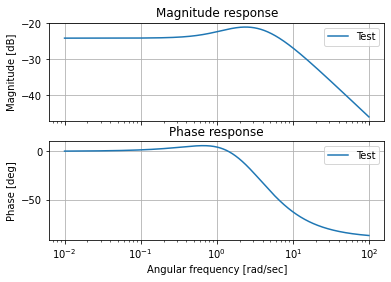

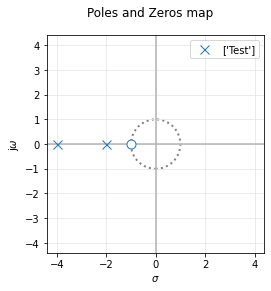

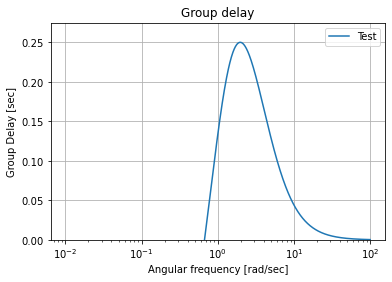

In [1]:
import scipy.signal as sig
import matplotlib as mpl
from splane import analyze_sys, pretty_print_lti , tfadd ,tfcascade
import numpy as np
import control.matlab as control
import matplotlib.pyplot as plt
#%matplotlib qt5

k = 1/2
num1 = [k,k]
den1 = [1 , 6 , 8]

tf1 = sig.TransferFunction(num1,den1)

analyze_sys( [tf1], ["Test" ])

### Simulación Simbólica

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

s = sp.symbols('s', complex = True)

sigma1 = 1
TV = ((s+1))/( (s+2)*(s+4) )                    # Transfer function
z11 = ((s+2)*(s+4))/((s+1)*(s+3))                 

k1 = sp.limit((s+1)*z11 , s , -sigma1 )
print(k1)                   #Residuo del tanque RC
c1 = 1/k1
r1 = sigma1/k1
print("C1 = ",c1,"\t","R1 = ",r1)

z3 = sp.factor(sp.simplify(sp.expand(z11 - k1/(s+sigma1))))
print(z3)
r2 = k1 = sp.limit(z3 , s , sp.oo )
print(r2)                   #Residuo del R serie
print("R2 = ", r2)

y5 = 1/sp.factor(sp.simplify(sp.expand(z3 - r2)))
print(y5)
k3 = sp.limit(y5/s , s , sp.oo )
print(k3)
print("C3 = ", k3)

k4 = 1/sp.factor(sp.simplify(sp.expand(y5 - s*k3)))
print(k4)
print("R4 = ",k4)

3/2
C1 =  2/3 	 R1 =  2/3
(2*s + 7)/(2*(s + 3))
1
R2 =  1
2*s + 6
2
C3 =  2
1/6
R4 =  1/6


### Síntesis Gráfica Y
<img src="./graficoY.png" align="center" width="500" />

### Simulación Circuital Y
El circuito para implementar la función transferencia pedida es el siguiente

<img src="./circuity.png" align="center" width="500" />

<img src="./tf_y.png" align="center" width="500" />

Ahora observamos que la base de nuestra transferencia se mantiene, sólo varía el nivel de ganancia impuesto por el parámetro __*k*__.

### Simulación Matemática

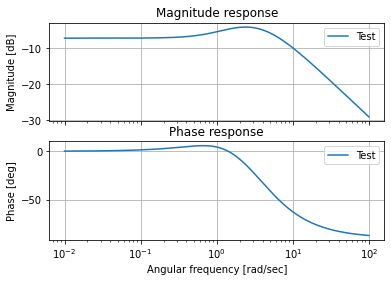

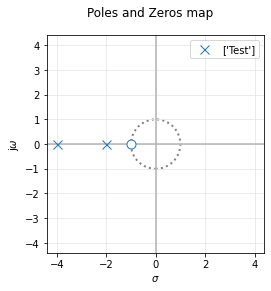

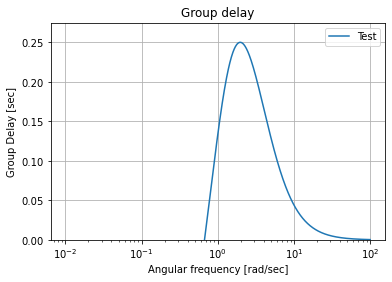

In [3]:
k = 7/2
num1 = [k,k]
den1 = [1 , 6 , 8]

tf1 = sig.TransferFunction(num1,den1)

analyze_sys( [tf1], ["Test" ])

In [4]:
y22 = ((s+4)*(s+2))/((s+3))

sigma1 = 1
r0 = 1/sp.expand(y22).subs(s,-sigma1)
yc = sp.factor(sp.simplify(sp.expand(y22 - 1/r0)))
print(r0)
print(yc)

k2 = sp.limit(((s+1)/yc), s , -sigma1 )
print(k2)                   #Residuo del tanque RC
c2 = 1/k2
r2 = sigma1/k2
print("C1 = ",c2,"\t","R1 = ",r2)

ye = 1/sp.factor(sp.simplify(sp.expand(1/yc - k2/(s+sigma1))))
print(ye)
k3 = sp.limit(ye/s , s , sp.oo )
print(k3)
print("C3 = ", k3)

r4 = 1/sp.factor(sp.simplify(sp.expand(ye - s*k3)))
print("R4 = ", r4)

2/3
(s + 1)*(2*s + 7)/(2*(s + 3))
4/5
C1 =  5/4 	 R1 =  5/4
5*s + 35/2
5
C3 =  5
R4 =  2/35
